# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [295]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [296]:
# Checking the number of mice.
#combined_data["Mouse ID"].unique() #Gives list of all unique Mouse ID's
id_count = combined_data['Mouse ID'].value_counts()
num_ids = len(id_count)
print(f"The number of mice by their Mouse ID is: {num_ids}.")

The number of mice by their Mouse ID is: 249.


In [297]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [298]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupe_ids = combined_data[combined_data['Mouse ID'] == 'g989']
all_dupe_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [300]:
# Checking the number of mice in the clean DataFrame.
#cleaned_df['Mouse ID'].count() # if it means check the number of mice, meaning ALL mice, then this will give 1880
new_id_count = cleaned_data_df['Mouse ID'].value_counts()
new_id_count = len(new_id_count) # If it means check number of unique mice, then this will give the correct #
print(f"The new mouse count is: {new_id_count}.")

The new mouse count is: 248.


## Summary Statistics

In [301]:
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [302]:
cleaned_data_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [303]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimens = cleaned_data_df.groupby('Drug Regimen')

mean = drug_regimens['Tumor Volume (mm3)'].mean()
median = drug_regimens['Tumor Volume (mm3)'].median()
variance = drug_regimens['Tumor Volume (mm3)'].var()
std = drug_regimens['Tumor Volume (mm3)'].std()
sem = drug_regimens['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({'Mean Tumor Volume': mean,
                              'Median Tumor Volume': median,
                              'Tumor Volume Variance': variance,
                              'Tumor Volume Std. Dev.': std,
                              'Tumor Volume Std. Err.': sem})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [304]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', Median='median', Variance='var', Standard_Deviation='std', SEM='sem')

summary_agg

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

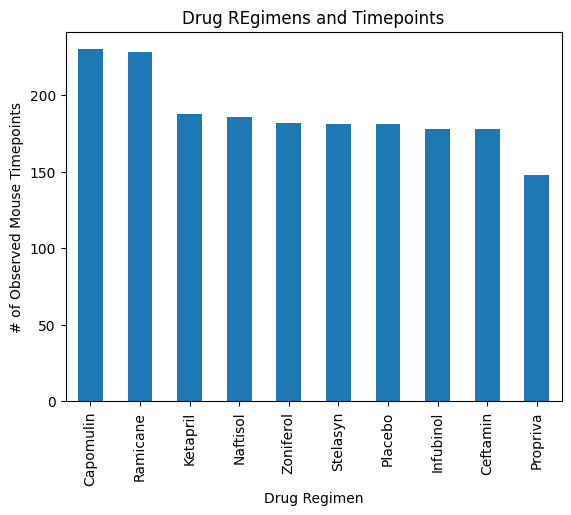

In [309]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = cleaned_data_df['Drug Regimen'].value_counts()

plot_pandas = bar_chart.plot.bar(color='tab:blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug REgimens and Timepoints')

plt.show()

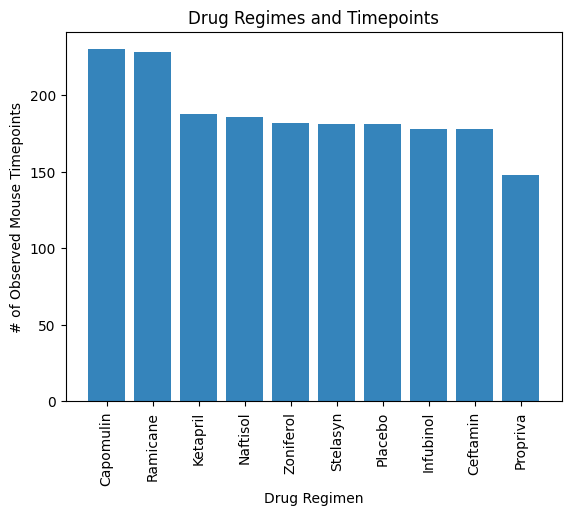

In [311]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = bar_chart.index.values
y_axis = bar_chart.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.90, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.title('Drug Regimes and Timepoints')

plt.show()

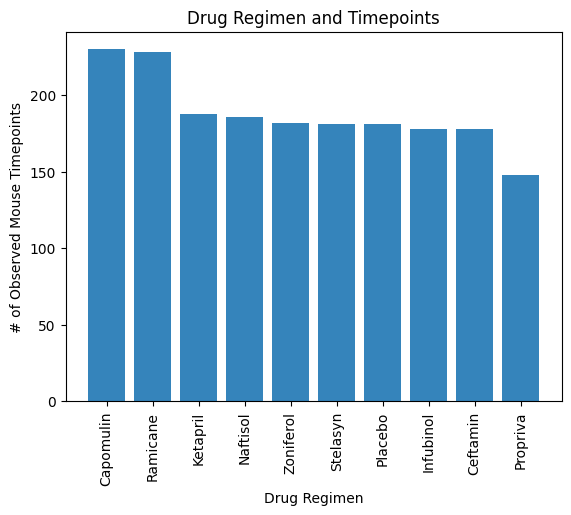

In [313]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = bar_chart.index.values
y_axis = bar_chart.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.90, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.title('Drug Regimen and Timepoints')

plt.show()

In [222]:
cleaned_data_df = cleaned_data_df[cleaned_data_df['Sex'].isin(['Male', 'Female'])]
cleaned_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#gender_counts = cleaned_data_df['Sex'].value_counts()
#gender_counts = gender_counts.sort_index(ascending=False)
#print(gender_counts)

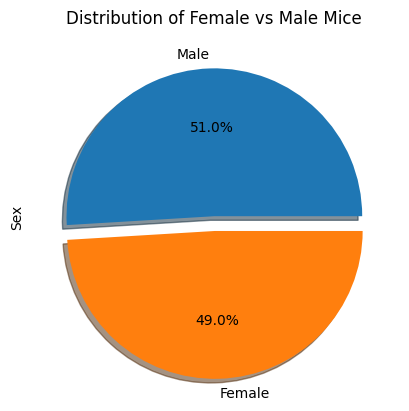

Sex
Male      958
Female    922
Name: count, dtype: int64


In [258]:
# Generate a pie plot showing the distribution of female versus male mice using 
gender_counts.plot.pie(autopct='%1.1f%%', shadow=True, explode=(0,0.1),startangle=1800, ylabel='Sex', title='Distribution of Female vs Male Mice')
plt.show()

gender_counts = cleaned_data_df['Sex'].value_counts()
print(gender_counts)

In [260]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#gender_counts = cleaned_data_df['Sex'].value_counts()
#gender_counts

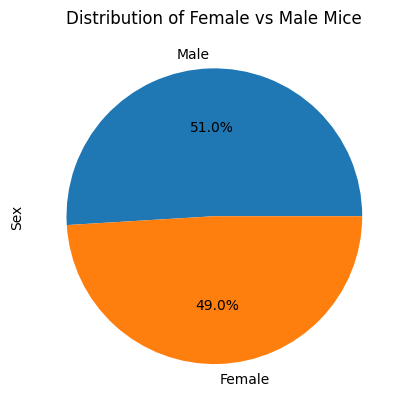

Sex
Male      958
Female    922
Name: count, dtype: int64

In [259]:
labels = ['Male', 'Female']
sizes = [gender_counts['Male'], gender_counts['Female']]

colors = ['blue', 'orange']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=1800)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

gender_counts = cleaned_data_df['Sex'].value_counts()
gender_counts

## Quartiles, Outliers and Boxplots

In [319]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = cleaned_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_data_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_timepoint_df = last_timepoint_df.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
volume_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [327]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = volume_timepoint_df[volume_timepoint_df['Drug Regimen'] == treatment]
    tumor_volume_data.append(subset['Tumor Volume (mm3)'])
    # add subset 
    q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
    q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 - 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = subset[(subset['Tumor Volume (mm3)'] < l_bound) | (subset['Tumor Volume (mm3)'] > u_bound)]
    

    print(f"Treatment: {treatment}.")
    print(f"The lower quartile is : {q1}.")
    print(f"The upper quartile is: {q3}.")
    print(f"The interquartile range is {iqr}.")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Values below {(l_bound)} could be outliers.")
    print(f"Values above {(u_bound)} could be outliers.")

Treatment: Capomulin.
The lower quartile is : 32.37735684.
The upper quartile is: 40.1592203.
The interquartile range is 7.781863460000004.
Number of outliers: 22
Values below 20.70456164999999 could be outliers.
Values above 28.486425109999995 could be outliers.
Treatment: Ramicane.
The lower quartile is : 31.56046955.
The upper quartile is: 40.65900627.
The interquartile range is 9.098536719999998.
Number of outliers: 24
Values below 17.912664470000003 could be outliers.
Values above 27.01120119 could be outliers.
Treatment: Infubinol.
The lower quartile is : 54.04860769.
The upper quartile is: 65.52574285.
The interquartile range is 11.477135160000003.
Number of outliers: 22
Values below 36.83290494999999 could be outliers.
Values above 48.310040109999996 could be outliers.
Treatment: Ceftamin.
The lower quartile is : 48.72207785.
The upper quartile is: 64.29983003.
The interquartile range is 15.577752179999997.
Number of outliers: 25
Values below 25.355449580000002 could be outlier

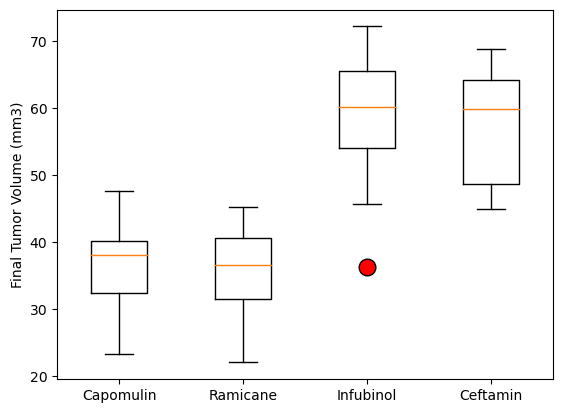

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

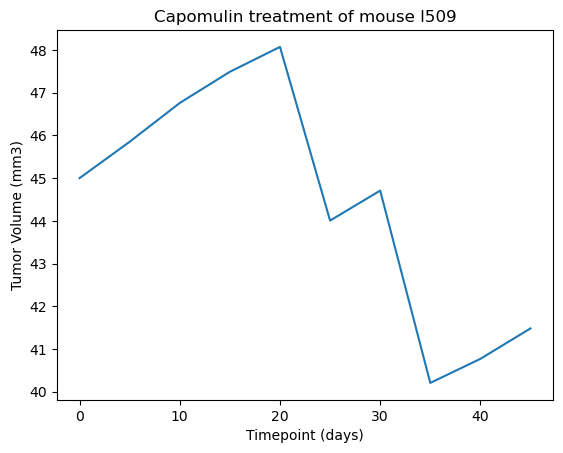

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


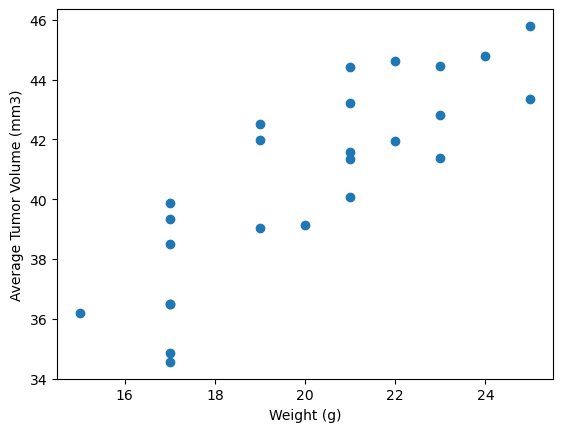

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


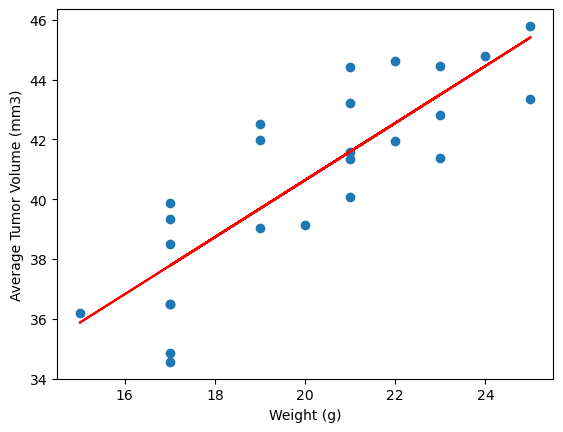

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
